In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [8]:
churn_df = pd.read_csv('Churn_Modelling.csv')
print(churn_df.shape)
pd.set_option('display.max_columns', 500)
churn_df.head()

(10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [19]:
churn_df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
churn_df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [35]:
churn_df.EstimatedSalary.value_counts()

EstimatedSalary
24924.92     2
101348.88    1
55313.44     1
72500.68     1
182692.80    1
            ..
120893.07    1
188377.21    1
55902.93     1
4523.74      1
38190.78     1
Name: count, Length: 9999, dtype: int64

In [208]:
X = churn_df.drop('Exited', axis = 1)
y = churn_df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [10]:
scale_cols = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
ohe_cols = ['Geography','Gender']
passthrough_cols = ['HasCrCard','IsActiveMember']

scale_pipe = Pipeline([('scaler', StandardScaler())])
ohe_pipe = Pipeline([('encoder', OneHotEncoder(handle_unknown = 'error'))])

feature_transformer = ColumnTransformer(transformers = [
    ('one-hot encoder',ohe_pipe, ohe_cols),
    ('scale numeric features',scale_pipe, scale_cols),
    ('select', 'passthrough', passthrough_cols)],
    remainder = 'drop'
)

In [210]:
# model selection
NUM_FOLDS = 10
clfs = [LogisticRegression(), RandomForestClassifier(), SVC()]
for clf in clfs:
    pipe = Pipeline([('preproc',feature_transformer),
               ('estimator',clf)])
    
    #score = pipe.fit(X_train, y_train).score(X_test,y_test)
    #print(f'Accuracy for {clf}: ', str(score))

    cv = KFold(n_splits=(NUM_FOLDS))
    k_scores = cross_val_score(pipe, X_train, y_train, cv = cv)
    print(k_scores)
    print(f'Average score for k-fold for {clf}: ', str(k_scores.mean()))

[0.78358209 0.80895522 0.77313433 0.81492537 0.83283582 0.81940299
 0.80149254 0.81641791 0.81343284 0.82537313]
Average score for k-fold for LogisticRegression():  0.8089552238805972
[0.82835821 0.85970149 0.84925373 0.86865672 0.88358209 0.85970149
 0.84477612 0.84776119 0.85373134 0.86268657]
Average score for k-fold for RandomForestClassifier():  0.855820895522388
[0.82089552 0.86119403 0.82686567 0.85820896 0.88358209 0.86567164
 0.8358209  0.86268657 0.8641791  0.8358209 ]
Average score for k-fold for SVC():  0.8514925373134329


##### Based on these results we will use a random forest classifier 

In [212]:
# hyperparameter tuning
grid = { 
    'clf__n_estimators': [200,300,400,500],
    'clf__max_features': ['sqrt', 'log2'],
    'clf__max_depth' : [4,5,6,7,8],
    'clf__criterion' :['gini', 'entropy'],
    'clf__random_state' : [18]
} 
# 4 * 2 * 5 * 2 * 1 = 80 model runs!
clf = RandomForestClassifier()
pipe = Pipeline([('preproc',feature_transformer),
               ('clf',clf)])

search = GridSearchCV(pipe, grid, cv = NUM_FOLDS, n_jobs = 2)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.855):
{'clf__criterion': 'gini', 'clf__max_depth': 8, 'clf__max_features': 'sqrt', 'clf__n_estimators': 300, 'clf__random_state': 18}


In [213]:
# test tuned model on test set
best_params = {}
for key, val in search.best_params_.items():
    best_params[key.replace('clf__','')] = val

clf = RandomForestClassifier(**best_params)
pipe = Pipeline([('preproc',feature_transformer),
               ('clf',clf)])
tuned_score = pipe.fit(X_train, y_train).score(X_test,y_test)
print('Accuracy for optimized hyperparamter-tuned model is: ', tuned_score)

Accuracy for optimized hyperparamter-tuned model is:  0.8696969696969697


In [214]:
## interpreting model results
pipe.steps[1][1].feature_importances_

array([0.01168584, 0.04597755, 0.00793445, 0.01230969, 0.0128828 ,
       0.0576964 , 0.35002676, 0.03074798, 0.08624492, 0.24738992,
       0.05711409, 0.0071786 , 0.07281099])

In [215]:
# obtain features from pipeline
t1 = list(pipe.named_steps["preproc"].transformers_[0][1].named_steps['encoder'].get_feature_names_out(ohe_cols))
t2 = list(pipe.named_steps["preproc"].transformers_[1][1].named_steps['scaler'].get_feature_names_out(scale_cols))
t3 = pipe.named_steps["preproc"].transformers_[2][2]
features = t1 + t2 + t3
features

['Geography_France',
 'Geography_Germany',
 'Geography_Spain',
 'Gender_Female',
 'Gender_Male',
 'CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'EstimatedSalary',
 'HasCrCard',
 'IsActiveMember']

In [216]:
feature_df = pd.DataFrame(features, columns = ['Feature'])
feature_df['Feature_Importance'] = list(pipe.steps[1][1].feature_importances_)
feature_df.sort_values(by = 'Feature_Importance', ascending = True, inplace = True)

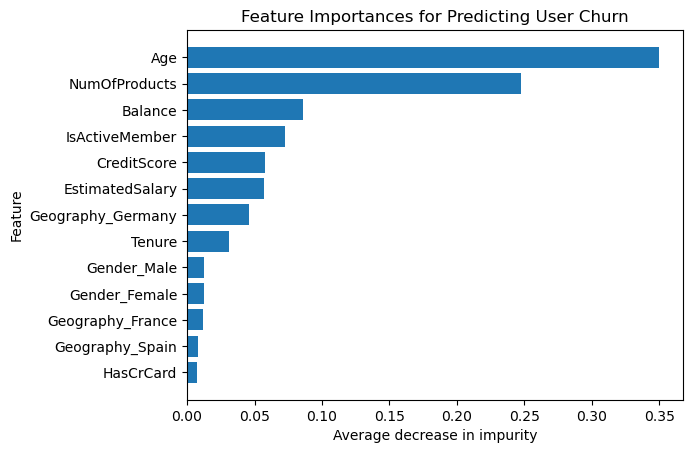

In [217]:
fig, ax  = plt.subplots()
ax.barh(feature_df['Feature'], feature_df['Feature_Importance'])
ax.set_title('Feature Importances for Predicting User Churn')
ax.set_ylabel('Feature')
ax.set_xlabel('Average decrease in impurity')

plt.show()

In [218]:
# we cannot say if each feature has a positive or negative impact on user churn using random forests, which sucks
# feature importance results are given in gini, as seen from tnued hyperparameters - this basically equates to scoring 
# the average decrease in impurity, meaning we want our trees to have leaf nodes with maximum purity (most results that go to the node are
# either mostly 1s or 0s, not 50/50. 
# with this, we can claim that age and num products are the two features that contribute to user churn the most
# we can also see that gender, has credit card, and geography are the least contributing features to user churn

## Deep Learning Model

In [5]:
import tensorflow as tf
#from keras import layers
#import tensorflow.keras.backend as K

2024-04-10 23:25:36.170775: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
tf.random.set_seed(42)

In [11]:
numeric_features = churn_df[scale_cols]

normalizer = tf.keras.layers.Normalization(axis=-1)
#normalizer.adapt(tf.convert_to_tensor(numeric_features))
normalizer(numeric_features.iloc[:3]) # see first three rows normalized

<tf.Tensor: shape=(3, 6), dtype=float32, numpy=
array([[6.1900000e+02, 4.2000000e+01, 2.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [6.0800000e+02, 4.1000000e+01, 1.0000000e+00, 8.3807859e+04,
        1.0000000e+00, 1.1254258e+05],
       [5.0200000e+02, 4.2000000e+01, 8.0000000e+00, 1.5966080e+05,
        3.0000000e+00, 1.1393157e+05]], dtype=float32)>

In [258]:
# obtain preprocessed data 
X = churn_df.drop('Exited', axis = 1)
y = churn_df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

X_train = preproc_pipe.fit_transform(X_train)
X_test = preproc_pipe.fit_transform(X_test)
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [271]:
X_train.shape

(6700, 13)

In [277]:
tf.constant(X_train).shape

TensorShape([6700, 13])

In [12]:
target = churn_df['Exited']
target.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [13]:
BATCH_SIZE = 2
def get_basic_model():
  model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
  ])

  model.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])
  return model

In [14]:
model = get_basic_model()
model.fit(numeric_features, target, epochs=15, batch_size=BATCH_SIZE)

Epoch 1/15
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 4s 568us/step - accuracy: 0.7076 - loss: 124.4062
Epoch 2/15
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 3s 566us/step - accuracy: 0.7155 - loss: 53.7751
Epoch 3/15
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 3s 567us/step - accuracy: 0.7200 - loss: 26.1893
Epoch 4/15
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 3s 553us/step - accuracy: 0.7962 - loss: 0.8268
Epoch 5/15
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 3s 589us/step - accuracy: 0.7999 - loss: 0.5005
Epoch 6/15
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 3s 575us/step - accuracy: 0.8000 - loss: 0.5005
Epoch 7/15
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 4s 835us/step - accuracy: 0.8000 - loss: 0.6323
Epoch 8/15
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 3s 559us/step - accuracy: 0.8000 - loss: 0.5004
Epoch 9/15
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 3s 556us/step - accuracy: 0.8000 - loss: 0.5004
Epoch 10/15
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 3s 565us/step - accuracy: 0.8000 - loss: 0.5004
Epoch 11/15
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 3s 591us/step - accuracy: 0.8000 - loss: 0.5004
Epoc